# Robust statistics

Initial commands

In [1]:
import pandas as pd
import random
import numpy as np
from scipy.stats import median_absolute_deviation
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf') #setting figure format to vector when exported
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.usetex'] = True
from scipy.stats.mstats import winsorize
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats.mstats import winsorize

Reading data

In [2]:
data=pd.read_excel("H227 ang.xlsx",header=2,nrows=194) #reading using pandas
data=data[1:]
data

,Unnamed: 0,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Ajdovščina,18151,18234,18277,18387,18705,18651,18854,18939,18958,18955,18848,18959,19047,19093,19130,19249
2,Beltinci,8546,8541,8538,8524,8540,8337,8358,8333,8335,8302,8334,8264,8261,8233,8183,8104
3,Benedikt,2171,2181,2199,2230,2299,2354,2368,2395,2439,2430,2464,2461,2491,2486,2514,2577
4,Bistrica ob Sotli,1470,1450,1437,1449,1454,1408,1418,1436,1421,1404,1390,1382,1365,1353,1346,1327
5,Bled,11098,11080,11132,8256,8188,8148,8131,8122,8177,8171,8192,8127,8035,7981,7873,7835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Železniki,6846,6862,6847,6884,6871,6773,6763,6770,6793,6789,6760,6742,6705,6675,6709,6689
190,Žetale,1413,1414,1410,1403,1404,1326,1343,1326,1355,1340,1335,1324,1301,1300,1296,1293
191,Žiri,4925,4932,4924,4919,4959,4904,4918,4902,4894,4890,4834,4827,4870,4841,4871,4876
192,Žirovnica,4179,4174,4204,4225,4256,4264,4321,4355,4402,4401,4389,4370,4381,4392,4411,4398


Generating a random sample of 20 elements from two different years

In [3]:
popul1=data['2009']
popul2=data['2012']
randSample1=[random.randrange(0, len(data)-1,1) for i in range(20)] #generating random sample that represent indexes of rows for first selected year
randSample2=[random.randrange(0, len(data)-1,1) for i in range(20)] #generating random sample that represent indexes of rows for second selected year
randSample1=[data['2009'][i] for i in randSample1] #first selected year is 2009
randSample2=[data['2012'][i] for i in randSample2] #second selected year is 2012
N=len(popul1)
n=len(randSample1)

## Evaluation of sample average and standard deviation

In [4]:
#Sample 1 is choosen
#Mean    
X_=np.mean(randSample1) #ubiased estimation of sample mean

#Defining unbiased estimation of standard deviation for sample of finite population
def SX_star_star_2(N,sampleList):
    n=len(sampleList)#n is length of the sample
    SX_star_star_2=((N-1)/N)*(1/(n-1))*sum(np.array([(Xi_-X_)**2 for Xi_ in sampleList]))
    return(SX_star_star_2)

print('Minimum sample value is: {:.3f}'.format(np.min(randSample1)))
print('Maximum sample value is: {:.3f}'.format(np.max(randSample1)))
print('Estimation of sample mean using method of moments is: {:.3f}'.format(X_))
print('Estimation of sample standard deviation using method of moments is: {:.3f}'.format((SX_star_star_2(N,randSample1))**0.5))

Minimum sample value is: 647.000
Maximum sample value is: 18651.000
Estimation of sample mean using method of moments is: 6194.800
Estimation of sample standard deviation using method of moments is: 5509.085


Determination of the influence functions

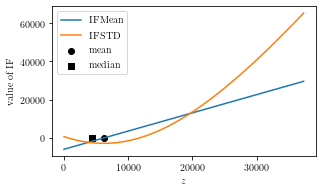

In [5]:
XiList=np.arange(0,2*max(randSample1),100)
IFMeanList=[]
IFSTDList=[]
IFVarList=[]
for i in range(len(XiList)):
    randSample1Loop=randSample1.copy()
    randSample1Loop.append(XiList[i])
    #Mean influence function
    IFMean=n*(np.mean(randSample1Loop)-np.mean(randSample1))
    IFMeanList.append(IFMean)
    #STD influence function
    IFSTD=n*((SX_star_star_2(N,randSample1Loop))**0.5-(SX_star_star_2(N,randSample1))**0.5) 
    IFSTDList.append(IFSTD)    
    #Variance influence function
    IFVar=n*((SX_star_star_2(N,randSample1Loop))-(SX_star_star_2(N,randSample1)))
    IFVarList.append(IFVar)    

#Plot
plt.figure(figsize=(12/2.54,7/2.54))
plt.plot(XiList,IFMeanList,label='IFMean')
plt.plot(XiList,IFSTDList,label='IFSTD')
plt.scatter(X_,0,c='black',marker='o',label='mean')
plt.scatter(np.median(randSample1),0,c='black',marker='s',label='median')
plt.legend()
plt.xlabel('$z$')
plt.ylabel('value of IF')
plt.show()

## Evaluation of sample median and MAD

In [6]:
#Sample 1 is choosen
X_tilde=np.median(randSample1)    
MAD=median_absolute_deviation(randSample1)

print('Estimation of sample median is: {:.3f}'.format(X_tilde))
print('The median absolute deviation (MAD) is: {:.3f}'.format(MAD))

Estimation of sample median is: 4326.000
The median absolute deviation (MAD) is: 4608.662


Determination of the influence functions

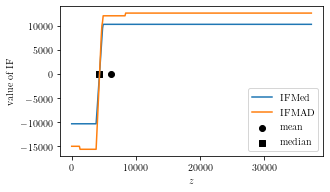

In [7]:
XiList=np.arange(0,2*max(randSample1),100)
IFMedList=[]
IFMADList=[]
for i in range(len(XiList)):
    randSample1Loop=randSample1.copy()
    randSample1Loop.append(XiList[i])
    #Median influence function
    IFMed=n*(np.median(randSample1Loop)-np.median(randSample1))
    IFMedList.append(IFMed)
    #MAD influence function
    IFMAD=n*(median_absolute_deviation(randSample1Loop)-(median_absolute_deviation(randSample1)))
    IFMADList.append(IFMAD)

#Plot
plt.figure(figsize=(12/2.54,7/2.54))
plt.plot(XiList,IFMedList,label='IFMed')
plt.plot(XiList,IFMADList,label='IFMAD')
plt.scatter(X_,0,c='black',marker='o',label='mean')
plt.scatter(X_tilde,0,c='black',marker='s',label='median')
plt.legend()
plt.xlabel('$z$')
plt.ylabel('value of IF')
plt.show()

## Winsorized average and median

Two methods for winsorization are shown in this chapter. First method, which was manually implemented is Huber's method, which detects the outliers based on the $\pm 1.5\cdot{S_{X}^{*}}$ distance from the sample mean $\overline{X}$ and replaces them with the value $\overline{X} + 1.5\cdot{S_{X}^{*}}$ or $\overline{X} - 1.5\cdot{S_{X}^{*}}$. The second method is built-in method for winsorization, which detects predefined amount of the lowest and the highest sample values and replaces them with the first next sample value that lies within the limits given (in the 'no outliers' region).

Estimation of winsorized average is: 5830.843
Estimation of winsorized median is: 4326.000
Estimation of winsorized average by built-in method is: 5308.550
Estimation of winsorized median is: 4326.000


C:\Users\hekic\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


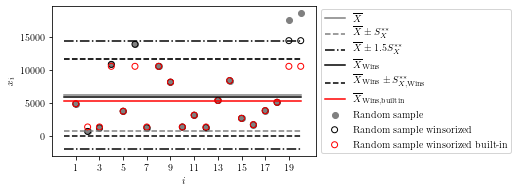

In [8]:
#Sample 1 is choosen
#Manual Huber's winsorization
randSample1Wins=[]
for i in range(n):
    if randSample1[i]>X_+1.5*SX_star_star_2(N,randSample1)**0.5:
        randSample1Wins.append(X_+1.5*SX_star_star_2(N,randSample1)**0.5)
    elif randSample1[i]<X_-1.5*SX_star_star_2(N,randSample1)**0.5:
        randSample1Wins.append(X_-1.5*SX_star_star_2(N,randSample1)**0.5)
    else:
        randSample1Wins.append(randSample1[i])

X_Wins=np.mean(randSample1Wins)
X_tilde_Wins=np.median(randSample1Wins)
SX_star_2_Wins=1.134*SX_star_star_2(N,randSample1)
print('Estimation of winsorized average is: {:.3f}'.format(X_Wins))
print('Estimation of winsorized median is: {:.3f}'.format(X_tilde_Wins))

#Built-in winsorization
WinsBI=winsorize([randSample1], limits=[0.2, 0.2]) #built-in function
print('Estimation of winsorized average by built-in method is: {:.3f}'.format(np.mean(WinsBI)))
print('Estimation of winsorized median is: {:.3f}'.format(np.median(WinsBI)))

#Plot of sample before and after winsorization with statistics
plt.figure(figsize=(12/2.54,7/2.54))
plt.scatter(np.arange(1,n+1,1),randSample1,c='gray',label='Random sample')
plt.scatter(np.arange(1,n+1,1),randSample1Wins,facecolors='none',edgecolor='black',label='Random sample winsorized')
plt.scatter(np.arange(1,n+1,1),WinsBI,facecolors='none',edgecolor='Red',label='Random sample winsorized built-in')
plt.plot([0,n],[X_,X_],c='gray',label='$\overline{X}$')
plt.plot([0,n],[X_-SX_star_star_2(N,randSample1)**0.5,X_-SX_star_star_2(N,randSample1)**0.5],'--',c='gray',label='$\overline{X} \pm S_{X}^{**}$')
plt.plot([0,n],[X_+SX_star_star_2(N,randSample1)**0.5,X_+SX_star_star_2(N,randSample1)**0.5],'--',c='gray')
plt.plot([0,n],[X_-1.5*SX_star_star_2(N,randSample1)**0.5,X_-1.5*SX_star_star_2(N,randSample1)**0.5],'-.',c='black',label='$\overline{X} \pm 1.5S_{X}^{**}$')
plt.plot([0,n],[X_+1.5*SX_star_star_2(N,randSample1)**0.5,X_+1.5*SX_star_star_2(N,randSample1)**0.5],'-.',c='black')
plt.plot([0,n],[X_Wins,X_Wins],c='black',label='$\overline{X}_\mathrm{Wins}$')
plt.plot([0,n],[X_Wins-SX_star_2_Wins**0.5,X_Wins-SX_star_2_Wins**0.5],'--',c='black',label='$\overline{X}_\mathrm{Wins} \pm S_{X,\mathrm{Wins}}^{**}$')
plt.plot([0,n],[X_Wins+SX_star_2_Wins**0.5,X_Wins+SX_star_2_Wins**0.5],'--',c='black')
plt.plot([0,n],[np.mean(WinsBI),np.mean(WinsBI)],c='red',label='$\overline{X}_\mathrm{Wins,built in}$')
plt.xticks(np.arange(1, n+1, 2))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('$i$')
plt.ylabel('$x_i$')
plt.show()

Determination of the influence functions

In [9]:
#Defining Winsorizing as a function
def WinsMeanMedian(N,sampleList):
    n=len(sampleList)
    X_=np.mean(sampleList) #ubiased estimation of sample mean
    SX_star_star_2=((N-1)/N)*(1/(n-1))*sum(np.array([(Xi_-X_)**2 for Xi_ in sampleList])) #unbiased estimation of standard deviation for sample of finite population
    sampleListWins=[]
    for i in range(n):
        if sampleList[i]>X_+1.5*SX_star_star_2**0.5:
            sampleListWins.append(X_+1.5*SX_star_star_2**0.5)
        elif sampleList[i]<X_-1.5*SX_star_star_2**0.5:
            sampleListWins.append(X_-1.5*SX_star_star_2**0.5)
        else:
            sampleListWins.append(sampleList[i])
    X_Wins=np.mean(sampleListWins)
    X_tilde_Wins=np.median(sampleListWins)
    return [X_Wins,X_tilde_Wins]

C:\Users\hekic\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


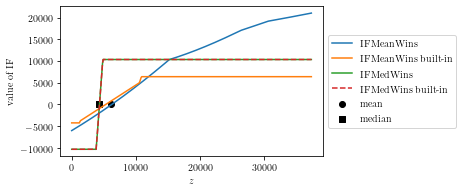

In [10]:
#Calculating IF for winsorized mean and median
XiList=np.arange(0,2*max(randSample1),100)
IFMeanWinsList=[]
IFMedWinsList=[]
IFMeanWinsBIList=[] #for built in function
IFMedWinsBIList=[] #for built in function
for i in range(len(XiList)):
    randSample1Loop=randSample1.copy()
    randSample1Loop.append(XiList[i])
    #Wins mean influence function
    IFMeanWins=n*(WinsMeanMedian(N,randSample1Loop)[0]-WinsMeanMedian(N,randSample1)[0])
    IFMeanWinsList.append(IFMeanWins)
    #Wins mean influence built-in function
    IFMeanWinsBI=n*(np.mean(winsorize([randSample1Loop], limits=[0.2, 0.2]))-np.mean(winsorize([randSample1], limits=[0.2, 0.2]))) 
    IFMeanWinsBIList.append(IFMeanWinsBI)
    #Wins median influence function
    IFMedWins=n*(WinsMeanMedian(N,randSample1Loop)[1]-WinsMeanMedian(N,randSample1)[1])
    IFMedWinsList.append(IFMedWins)
    #Wins median influence built-in function
    IFMedWinsBI=n*(np.median(winsorize([randSample1Loop], limits=[0.2, 0.2]))-np.median(winsorize([randSample1], limits=[0.2, 0.2]))) 
    IFMedWinsBIList.append(IFMedWinsBI) 
    
#Plot
plt.figure(figsize=(12/2.54,7/2.54))
plt.plot(XiList, IFMeanWinsList,label='IFMeanWins')
plt.plot(XiList, IFMeanWinsBIList,label='IFMeanWins built-in')
plt.plot(XiList,IFMedWinsList,label='IFMedWins')
plt.plot(XiList,IFMedWinsBIList,'--',label='IFMedWins built-in')
plt.scatter(X_,0,c='black',marker='o',label='mean')
plt.scatter(X_tilde,0,c='black',marker='s',label='median')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('$z$')
plt.ylabel('value of IF')
plt.show()

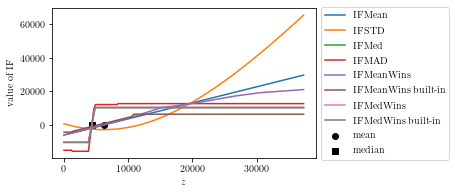

In [11]:
#Plot of all statistics in one figure
plt.figure(figsize=(12/2.54,7/2.54))
plt.plot(XiList,IFMeanList,label='IFMean')
plt.plot(XiList,IFSTDList,label='IFSTD')
plt.plot(XiList,IFMedList,label='IFMed')
plt.plot(XiList,IFMADList,label='IFMAD')
plt.plot(XiList, IFMeanWinsList,label='IFMeanWins')
plt.plot(XiList, IFMeanWinsBIList,label='IFMeanWins built-in')
plt.plot(XiList,IFMedWinsList,label='IFMedWins')
plt.scatter(X_,0,c='black',marker='o',label='mean')
plt.scatter(X_tilde,0,c='black',marker='s',label='median')
plt.plot(XiList,IFMedWinsBIList,label='IFMedWins built-in')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('$z$')
plt.ylabel('value of IF')
plt.show()

It can be seen from the figure above that Median, MAD, Winsorized median (Huber's), Winsorized mean (built-in) and Winsorized median (built-in) are robust estimates. On the other side Mean and STD are not robust estimates since their influence function does not converge. Influence function of Winsorized mean lies almost entirely below the Infleunce function of mean, but does not converge as well. This is due to the criteria in the Huber's method, where the limits for the outliers are based on the sample mean and sample standard deviation, which depend on the value of 'z' we are artificially adding to the sample. 

## Hypothesis testing

### Manual T-test

Number of degrees of freedom "nu" is: 35.647
Value of statistic T is: -0.851963
p value is: 0.399922


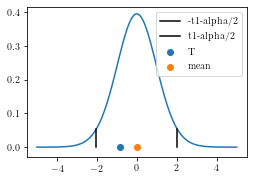

In [12]:
#Manual T-test is calculated considering the known population size, and therefore gives different values of T and p comparing to built-in test
randSampleX=randSample1
randSampleY=randSample2
populX=popul1
populY=popul2

X_=np.mean(randSampleX) #ubiased estimation of sample mean
Y_=np.mean(randSampleY) #ubiased estimation of sample mean
nX=len(randSampleX)
nY=len(randSampleY)
NX=len(populX)
NY=len(populY)

SX_star_star_2=((NX-1)/NX)*(1/(nX-1))*sum(np.array([(Xi_-X_)**2 for Xi_ in randSampleX]))
SY_star_star_2=((NY-1)/NY)*(1/(nY-1))*sum(np.array([(Yi_-Y_)**2 for Yi_ in randSampleY]))
#SX_star_star_2=(1/(nX-1))*sum(np.array([(Xi_-X_)**2 for Xi_ in randSampleX])) #in case if NX is unknown (python built-in uses this equation)
#SY_star_star_2=(1/(nY-1))*sum(np.array([(Yi_-Y_)**2 for Yi_ in randSampleY])) #in case if NY is unknown (python built-in uses this equation)

alpha=0.05 #is only used for plot #H0 is: Mean values X_ and Y_ are the same, H1 is: Mean values X_ and Y_ are not the same

#Defining the 't' distribution
nu=(((SX_star_star_2/nX)+(SY_star_star_2/nY))**2)/(((SX_star_star_2/nX)**2/(nX-1))+((SY_star_star_2/nY)**2)/(nY-1))
print('Number of degrees of freedom "nu" is: {:.3f}'.format(nu))

#Calculating the statistic 'T'
T=(X_-Y_)/((SX_star_star_2/nX)+(SY_star_star_2/nY))**0.5
print('Value of statistic T is: {:6f}'.format(T))

#Calculating the p-value
p_val=2*(1-t.cdf(abs(T),nu))
print('p value is: {:.6f}'.format(p_val))

#Plot
plt.figure(figsize=(10/2.54,7/2.54))
xList=np.linspace(-5,5,102,endpoint=True)
plt.plot(xList,t.pdf(xList,nu))
plt.scatter(T,0,label='T')
plt.scatter(t.ppf(0.5,nu),0,label='mean')
plt.plot([t.ppf(alpha/2,nu),t.ppf(alpha/2,nu)],[0,t.pdf(t.ppf(alpha/2,nu),nu)],label='-t1-alpha/2',color='black')
plt.plot([t.ppf(1-alpha/2,nu),t.ppf(1-alpha/2,nu)],[0,t.pdf(t.ppf(1-alpha/2,nu),nu)],label='t1-alpha/2',color='black')
plt.legend()
plt.show()

### Built-in T-test

In [13]:
# In the built-in t test method, it is assumed that number N is not known, therefore variance is calculated as SX*2=(n/(n-1))*SX2
ttest_ind(randSampleX, randSampleY, equal_var = False)

print('Value of statistic T as calculated by built-in T-test is: {:.6f}'.format(ttest_ind(randSampleX, randSampleY, equal_var = False)[0]))
print('p value as calculated by built-in T-test is: {:.6f}'.format(ttest_ind(randSampleX, randSampleY, equal_var = False)[1]))

Value of statistic T as calculated by built-in T-test is: -0.849753
p value as calculated by built-in T-test is: 0.401134


### Built-in Mann-Whitney test

In [14]:
UMW=mannwhitneyu(randSampleX, randSampleY,alternative='two-sided')[0]
pMW=mannwhitneyu(randSampleX, randSampleY,alternative='two-sided')[1]
print('Value of statistic U as calculated by built-in Mann-Whitney test is: {:.3f}'.format(UMW)) #smaller values of U would gives us the information that we have to reject the null hypothesis
print('p value as calculated by built-in Mann-Whitney test is: {:.3f}'.format(pMW))

Value of statistic U as calculated by built-in Mann-Whitney test is: 174.000
p value as calculated by built-in Mann-Whitney test is: 0.490


As seen on the figure below, the distribution of sample X and sample Y are not normal and therefore the t-test, which assumes the normal (student t) distribution gives different p values than Mann-Whitney test, which does not assume the normal distribution and is therefore appropriate for non normal distributions.

Ucrit, obtained from the table of critical values for U (nX=nY=20,alpha=0.05) is 127. Since value of U is higher than U crit, we can not claim that mean values of sample X and Y are different.

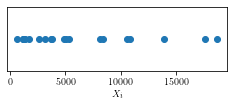

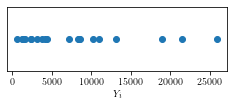

In [15]:
plt.figure(figsize=(10/2.54,3/2.54))
plt.scatter(randSampleX,np.zeros(len(randSampleX)))
plt.xlabel('$X_i$')
plt.tick_params(axis='y',which='both',left=False,labelleft=False)
plt.show()

plt.figure(figsize=(10/2.54,3/2.54))
plt.scatter(randSampleY,np.zeros(len(randSampleY)))
plt.xlabel('$Y_i$')
plt.tick_params(axis='y',which='both',left=False,labelleft=False)
plt.show()